Load & Importing Libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

# Load data
path = r"C:\Users\bluea\Downloads\archive (6)\ds_salaries.csv"
df = pd.read_csv(path, low_memory=False)

In [50]:
# Explore the data
print(df.head()) # Print the first few rows

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [51]:
#drop salary, comparison by usd is better
#drop salary_currency, usd is already in use
##possible improvement: use EUR and RMB (CH)
df.drop(columns=['salary', 'salary_currency'], inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [52]:
#check for missing values
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [53]:
#check the number of unique value on object datatype
df.select_dtypes(include='object').nunique()

experience_level       4
employment_type        4
job_title             93
employee_residence    78
company_location      72
company_size           3
dtype: int64

In [54]:
#categorize the data title
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [55]:
def segment_job_title(job_title):
    data_scientist_titles = ['Data Scientist', 'Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Machine Learning Researcher', 'Lead Data Scientist', 'Data Science Consultant', 'Data Scientist Lead', 'Product Data Scientist', 'Staff Data Scientist', 'Principal Data Scientist']
    machine_learning_titles = ['ML Engineer', 'Machine Learning Engineer', 'Applied Machine Learning Engineer', 'Machine Learning Scientist', 'Deep Learning Researcher', 'Machine Learning Infrastructure Engineer', 'Machine Learning Software Engineer', 'Machine Learning Research Engineer', 'NLP Engineer', 'Machine Learning Developer', '3D Computer Vision Researcher', 'Principal Machine Learning Engineer', 'Machine Learning Manager', 'Lead Machine Learning Engineer', 'Head of Machine Learning']
    data_analyst_titles = ['Data Analyst', 'Data Quality Analyst', 'Compliance Data Analyst', 'Business Data Analyst', 'Staff Data Analyst', 'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 'Finance Data Analyst']
    data_engineer_titles = ['Data Modeler', 'Analytics Engineer', 'Data Strategist', 'Data Engineer', 'Data Operations Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 'Cloud Data Engineer', 'ETL Developer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    bi_analytics_titles = ['Business Intelligence Engineer', 'BI Data Engineer', 'BI Developer', 'BI Analyst', 'Power BI Developer', 'Data Analytics Engineer', 'Data Analytics Consultant']
    
    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'Business Intelligence & Analytics'
    else:
        return 'Uncategorized'

In [56]:
df['job_title'] = df['job_title'].apply(segment_job_title)

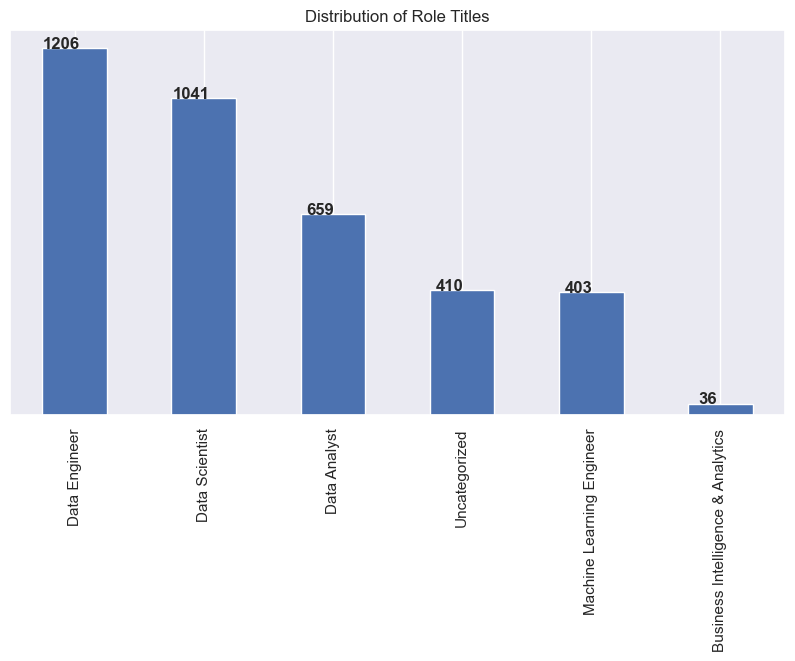

In [57]:
plt.figure(figsize=(10, 5))
ax = df['job_title'].value_counts().plot(kind='bar')
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Role Titles')
for i, v in enumerate(df['job_title'].value_counts()):
    ax.text(i-0.1, v+0.5, str(v),ha='center', fontweight='bold')
plt.show()

In [58]:
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [59]:
def categorize_region(country):
    print(country)
    europe = ['ES', 'DE', 'GB', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'IL', 'PT', 'RU', 'HR', 'EE', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'AL', 'LT', 'HU', 'AT', 'SK', 'CZ', 'DK', 'BE', 'LU', 'MT']
    north_america = ['US', 'CA', 'MX']
    south_america = ['CO', 'BR', 'AR', 'CL', 'BO']
    africa = ['NG', 'GH', 'KE', 'MA', 'DZ']
    asia = ['IN', 'HK', 'SG', 'TH', 'VN', 'PK', 'CN', 'PH', 'AE', 'MY', 'JP', 'IQ']
    oceania = ['AU', 'NZ']
    
    if country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in africa:
        return 'Africa'
    elif country in asia:
        return 'Asia'
    elif country in oceania:
        return 'Oceania'
    else:
        return 'Other'


In [ ]:
#apply function to company_location column and create new one
df['company_location'] = df['company_location'].apply(categorize_region)

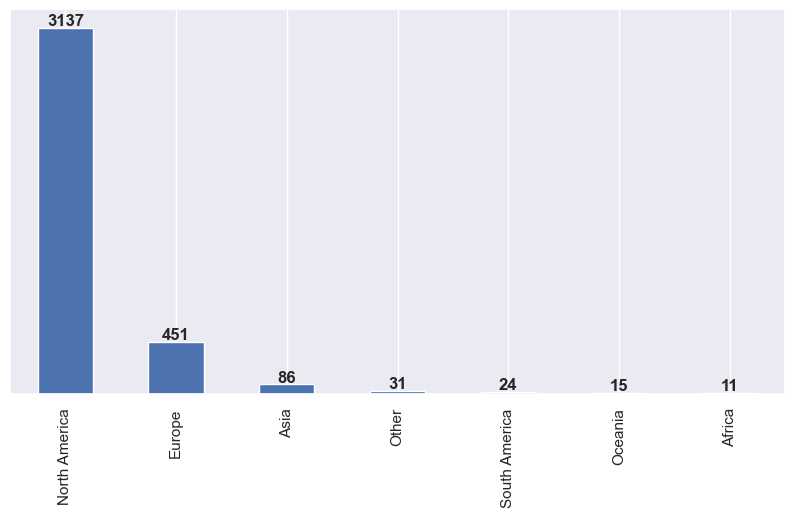

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax = df['company_location'].value_counts().plot(kind='bar')
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
for i, v in enumerate(df['company_location'].value_counts()):
    plt.text(i, v+20, str(v), ha='center', fontweight='bold')
plt.show()

In [ ]:
def categorize_residence_region(country):
    print(country)
    europe = ['ES', 'DE', 'GB', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA', 'IE', 'IL', 'PT', 'RU', 'HR', 'EE', 'AM', 'BA', 'GR', 'MK', 'LV', 'RO', 'IT', 'AL', 'LT', 'HU', 'AT', 'SK', 'CZ', 'DK', 'BE', 'LU', 'MT']
    north_america = ['US', 'CA', 'MX']
    south_america = ['CO', 'BR', 'AR', 'CL', 'BO']
    africa = ['NG', 'GH', 'KE', 'MA', 'DZ']
    asia = ['IN', 'HK', 'SG', 'TH', 'VN', 'PK', 'CN', 'PH', 'AE', 'MY', 'JP', 'IQ']
    oceania = ['AU', 'NZ']
    
    if country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in africa:
        return 'Africa'
    elif country in asia:
        return 'Asia'
    elif country in oceania:
        return 'Oceania'
    else:
        return 'Other'
#apply function to company_location column and create new one
df['employee_residence'] = df['employee_residence'].apply(categorize_region)

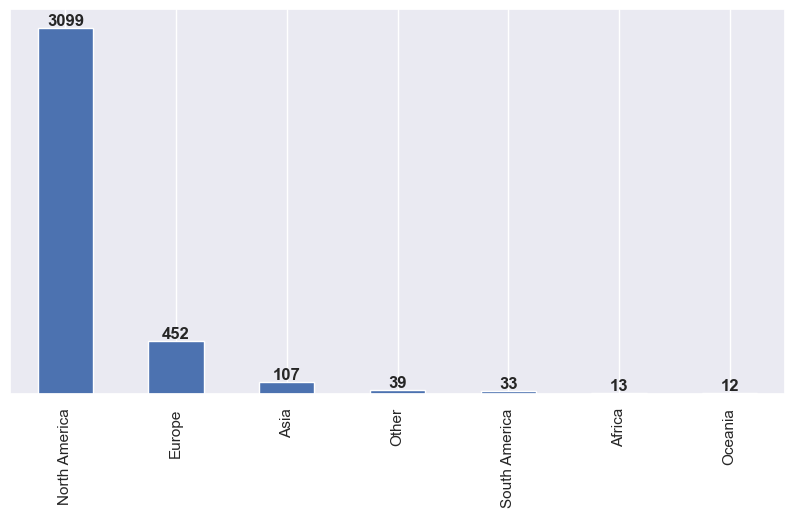

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
ax = df['employee_residence'].value_counts().plot(kind='bar')
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
for i, v in enumerate(df['employee_residence'].value_counts()):
    plt.text(i, v+20, str(v), ha='center', fontweight='bold')
plt.show()

In [64]:
df.remote_ratio.unique()

array([100,   0,  50], dtype=int64)

In [65]:
#made remote labels more comprehensible
label_map = {100: 'Remote', 50: 'Hybrid', 0: 'In-Office'}
df['remote_ratio'] = df['remote_ratio'].map(label_map)


In [66]:
#made experience level labels more comprehensible
experience_level_label = {'SE': 'Senior', 'MI': 'Mid-Level', 'EX': 'Executive', 'EN': 'Entry-Level'}
df['experience_level'] = df['experience_level'].map(experience_level_label)

In [67]:
#made experience level labels more comprehensible
employment_type_label = {'CT': 'Contract', 'PT': 'Parter-Time', 'FL': 'Freelancer', 'FT': 'Full-Time'}
df['employment_type'] = df['employment_type'].map(employment_type_label)

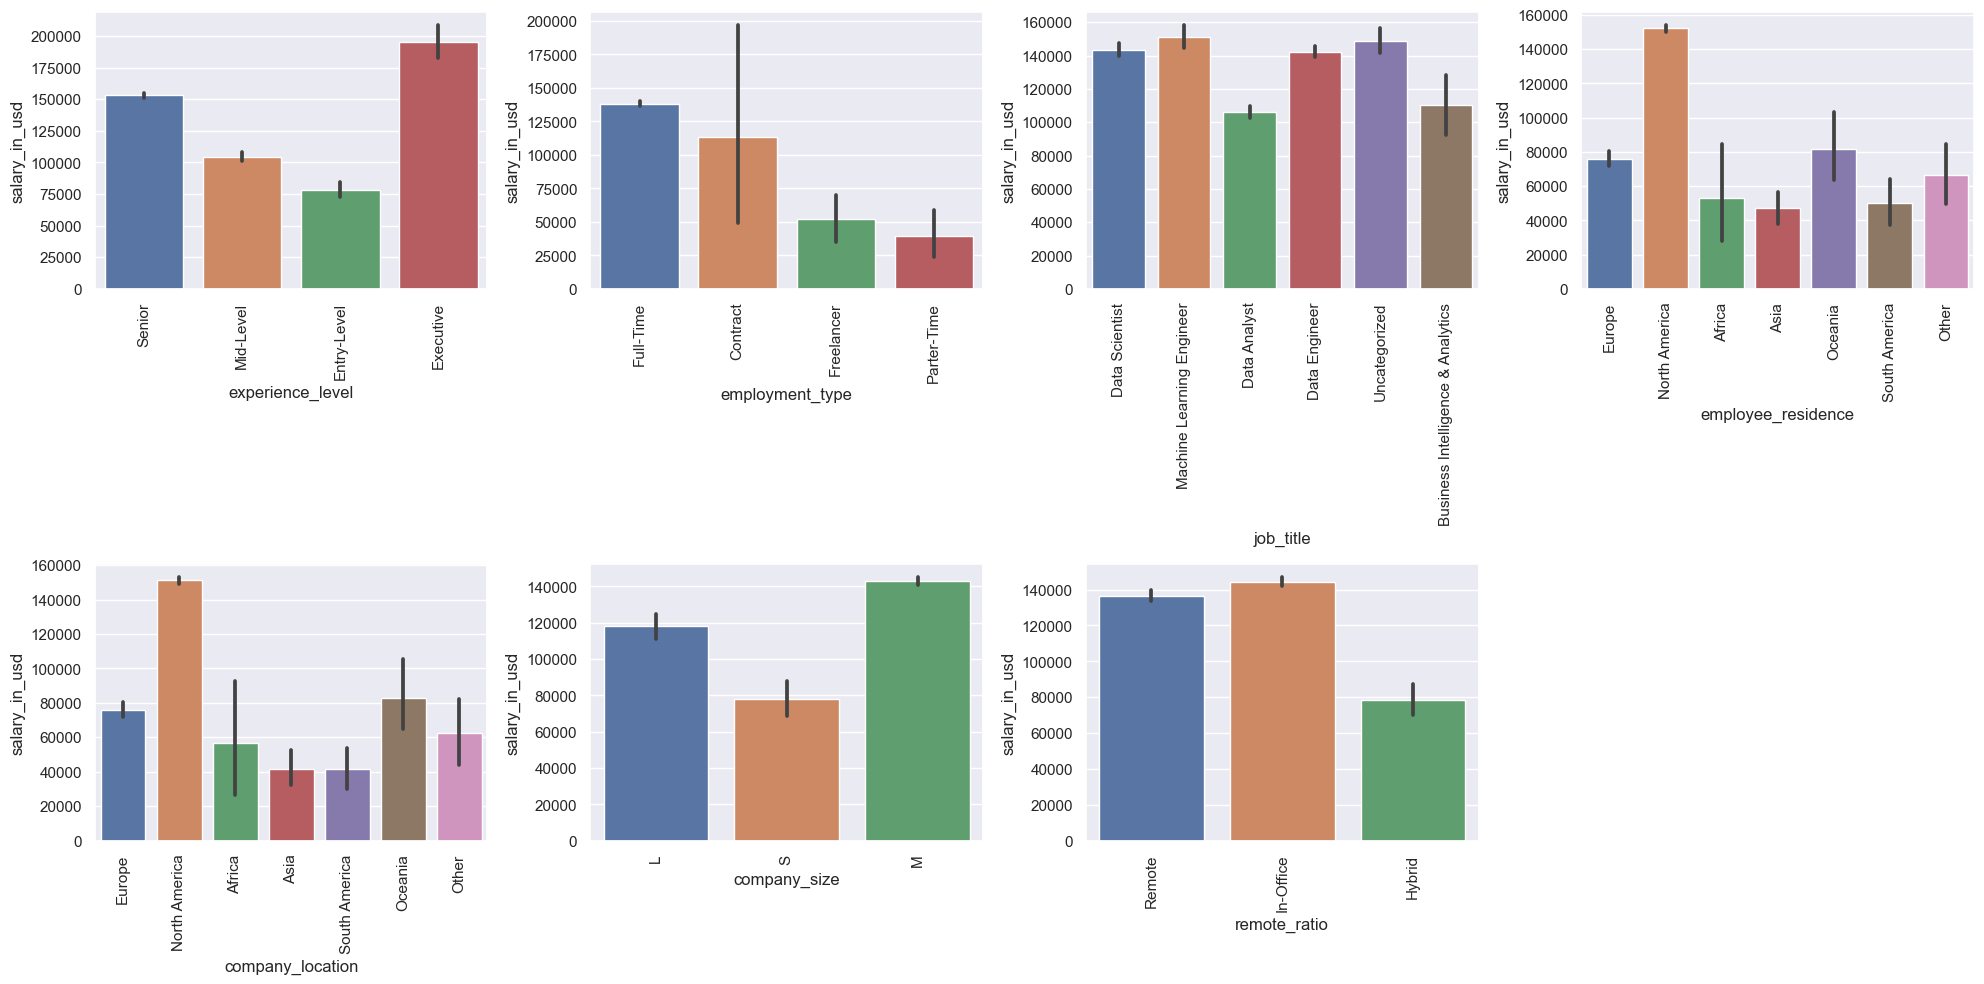

In [68]:
# list categorical variables to plot
cat_vars = ['experience_level', 'employment_type', 'job_title', 'employee_residence',
           'company_location', 'company_size', 'remote_ratio']

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# create barplot for each cat var
for i, var in enumerate(cat_vars):
    if var in df.columns and not df[var].isnull().all():
        sns.barplot(x=var, y='salary_in_usd', data=df, ax=axs[i//4, i%4], estimator=np.mean)
        axs[i//4, i%4].set_xticklabels(axs[i//4, i%4].get_xticklabels(), rotation=90)

# remove the last subplot
fig.delaxes(axs[1,3])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()



FixedFormatter should only be used together with FixedLocator


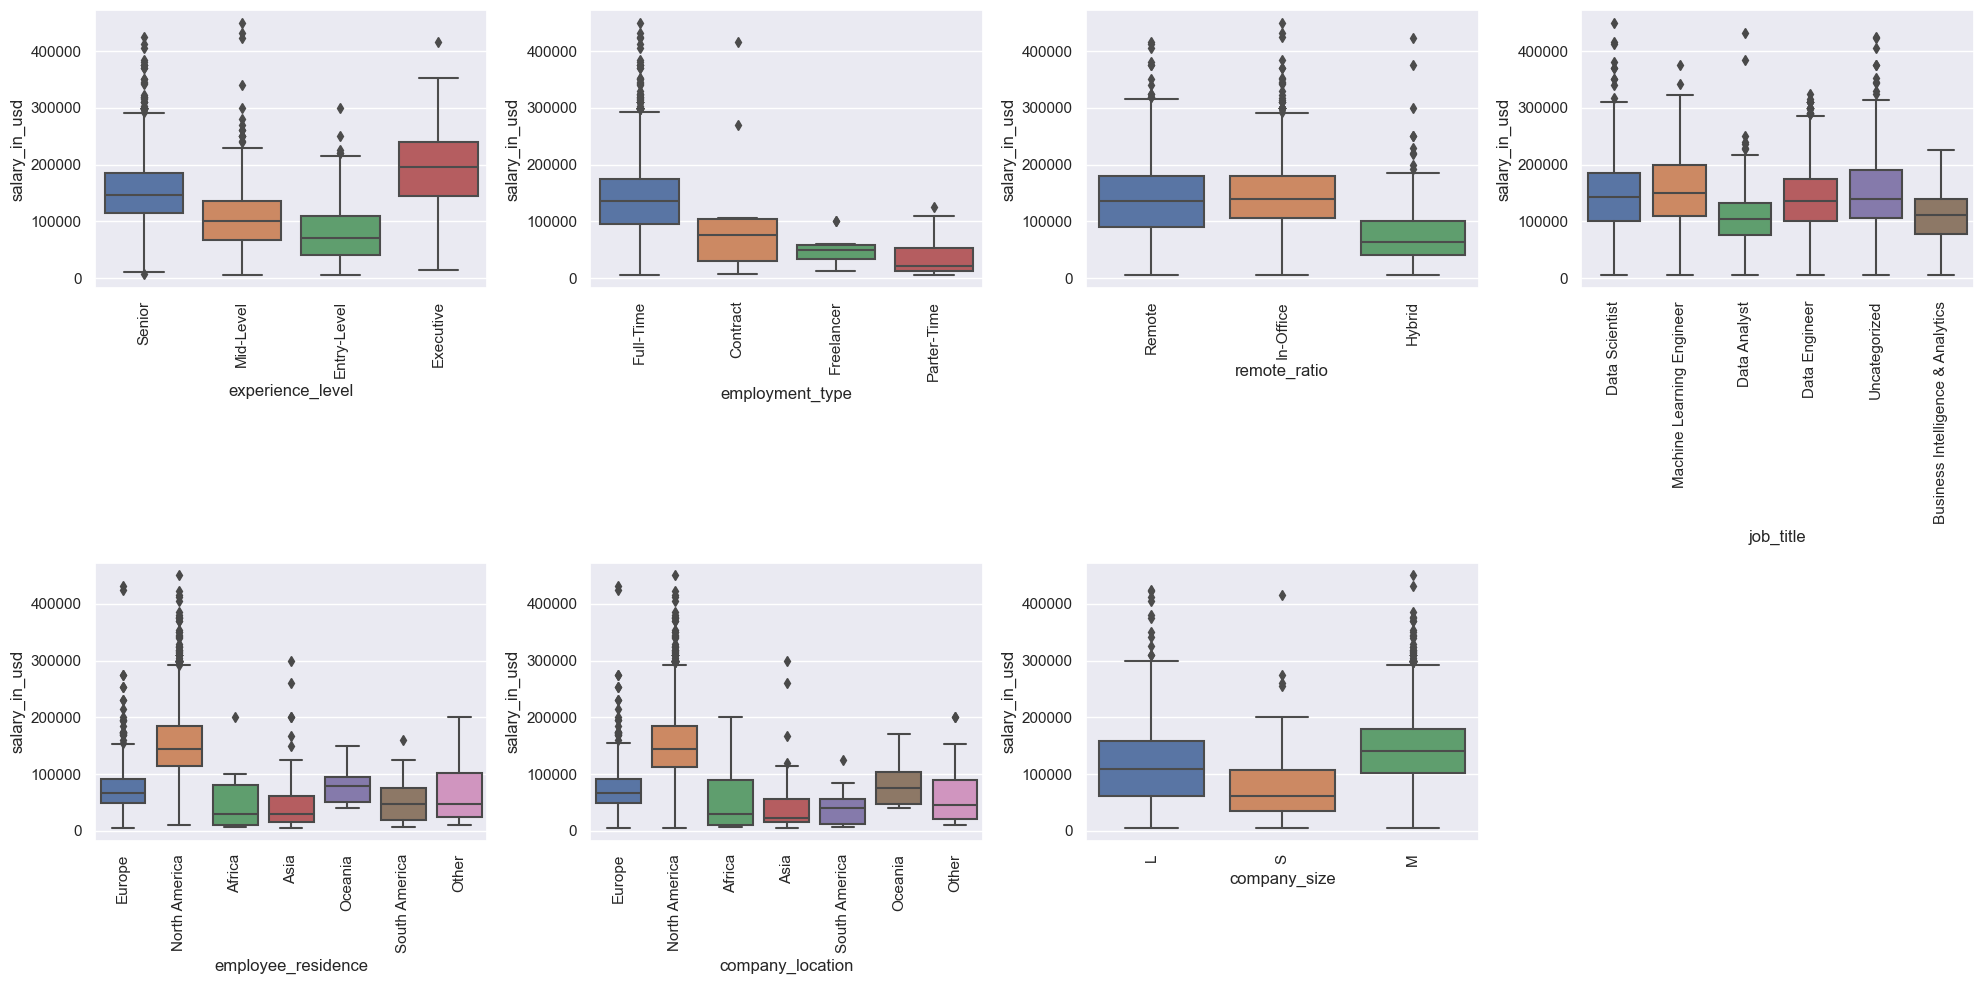

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# Plot each boxplot in a separate subplot
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, ax=axs[0, 0])
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, ax=axs[0, 1])
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df, ax=axs[0, 2])
sns.boxplot(x='job_title', y='salary_in_usd', data=df, ax=axs[0, 3])
sns.boxplot(x='employee_residence', y='salary_in_usd', data=df, ax=axs[1, 0])
sns.boxplot(x='company_location', y='salary_in_usd', data=df, ax=axs[1, 1])
sns.boxplot(x='company_size', y='salary_in_usd', data=df, ax=axs[1, 2])

# Remove the empty subplot
fig.delaxes(axs[1, 3])

# Rotate the x-axis labels on all subplots
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


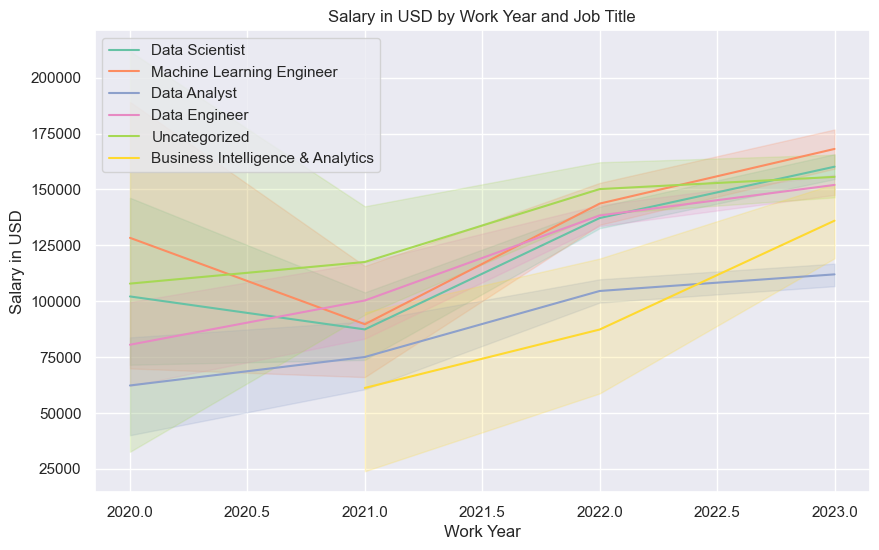

In [70]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=df)
plt.title("Salary in USD by Work Year and Job Title")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")
plt.legend(loc='upper left')

plt.show()

In [71]:
# loop over each column in df where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    # print column name and unique values
    print(f"{col}: {df[col].unique()}")

experience_level: ['Senior' 'Mid-Level' 'Entry-Level' 'Executive']
employment_type: ['Full-Time' 'Contract' 'Freelancer' 'Parter-Time']
job_title: ['Data Scientist' 'Machine Learning Engineer' 'Data Analyst'
 'Data Engineer' 'Uncategorized' 'Business Intelligence & Analytics']
employee_residence: ['Europe' 'North America' 'Africa' 'Asia' 'Oceania' 'South America'
 'Other']
remote_ratio: ['Remote' 'In-Office' 'Hybrid']
company_location: ['Europe' 'North America' 'Africa' 'Asia' 'South America' 'Oceania'
 'Other']
company_size: ['L' 'S' 'M']


In [72]:
from sklearn import preprocessing

#loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    #initiliaze a label encoder object
    label_encoder = preprocessing.LabelEncoder()
    
    #fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    #transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    #print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")


experience_level: [3 2 0 1]
employment_type: [2 0 1 3]
job_title: [3 4 1 2 5 0]
employee_residence: [2 3 0 1 4 6 5]
remote_ratio: [2 1 0]
company_location: [2 3 0 1 6 4 5]
company_size: [0 2 1]


In [73]:
df.dtypes

work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary_in_usd         int64
employee_residence    int32
remote_ratio          int32
company_location      int32
company_size          int32
dtype: object

<AxesSubplot: >

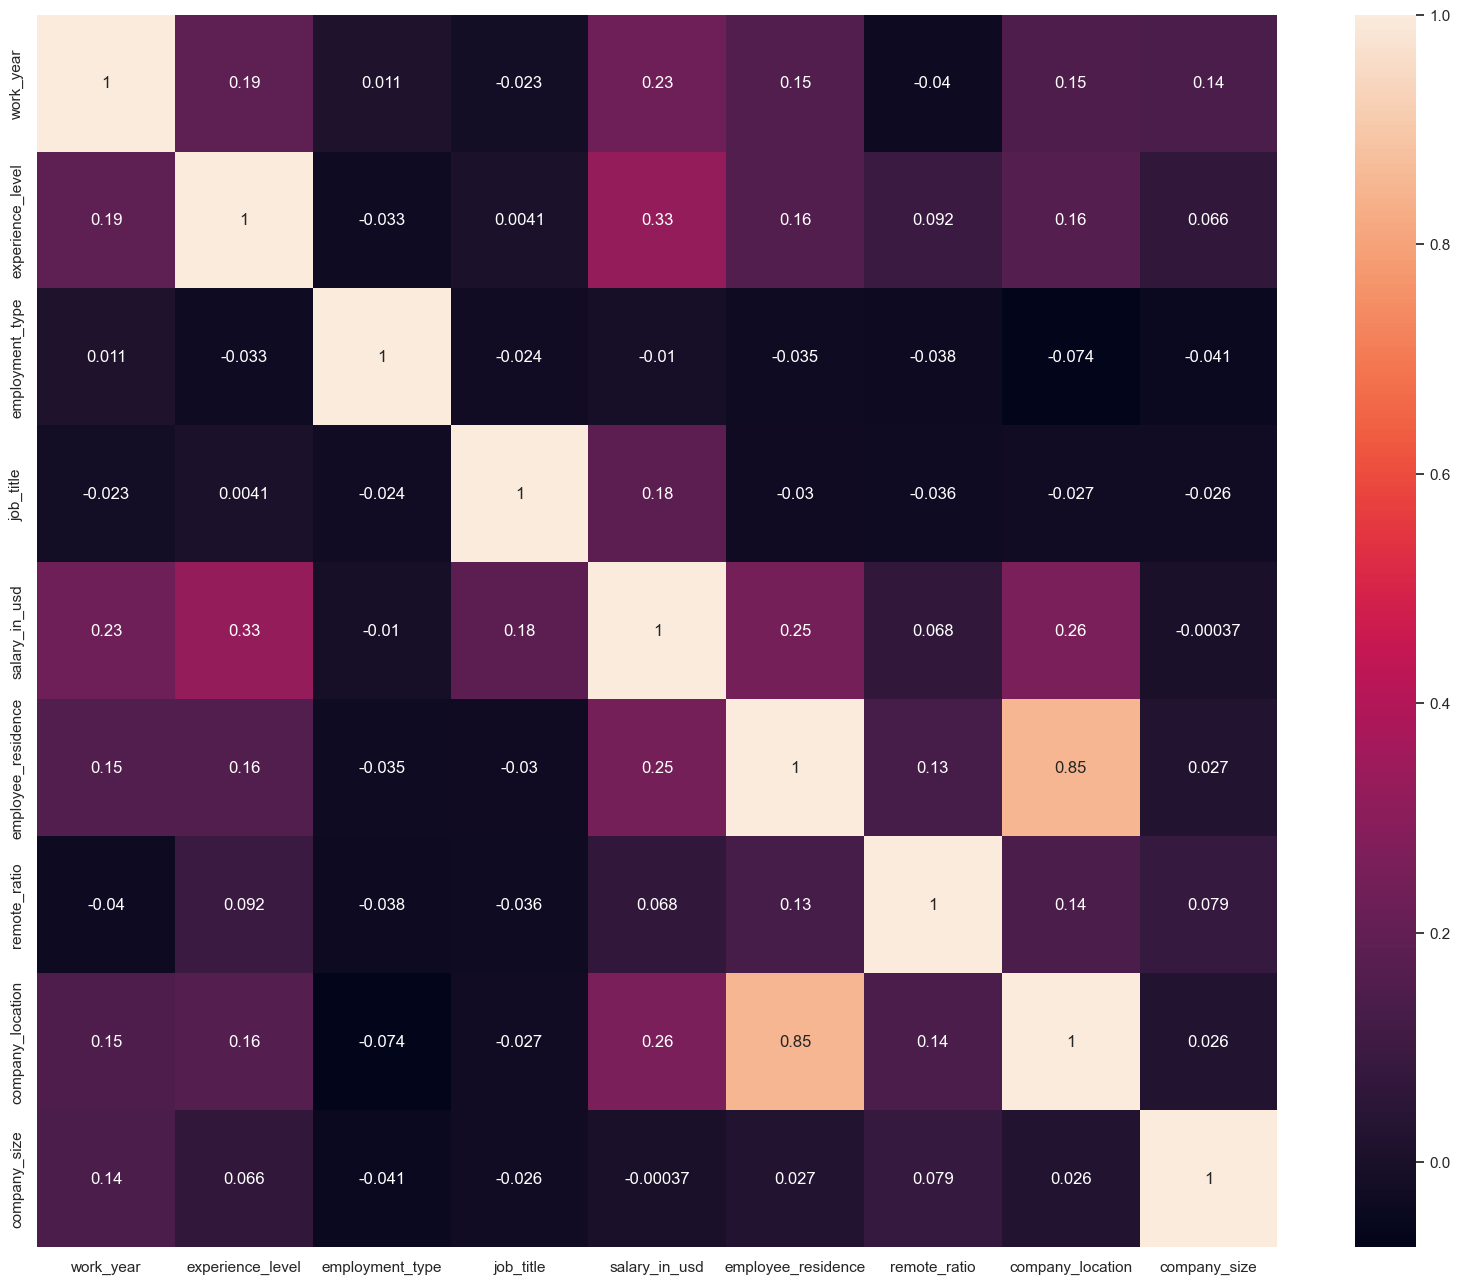

In [74]:
#correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [75]:
#train the test split
x = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

In [76]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [77]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# create a decisiontreeregressor object
dtree = DecisionTreeRegressor()

# define the hyperparameters to tune and their value
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the gridsearchCV object to the data
grid_search.fit(x_train, y_train)

# print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2}


In [78]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=8, min_samples_split=2)
dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=8,
                      random_state=0)

In [79]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(mse))
print('RMSE score is {}'.format(rmse))

MAE is 39218.20860774054
MAPE is 0.37670151676169783
MSE is 0.34346207101607973
R2 score is 0.34346207101607973
RMSE score is 0.5860563718756753


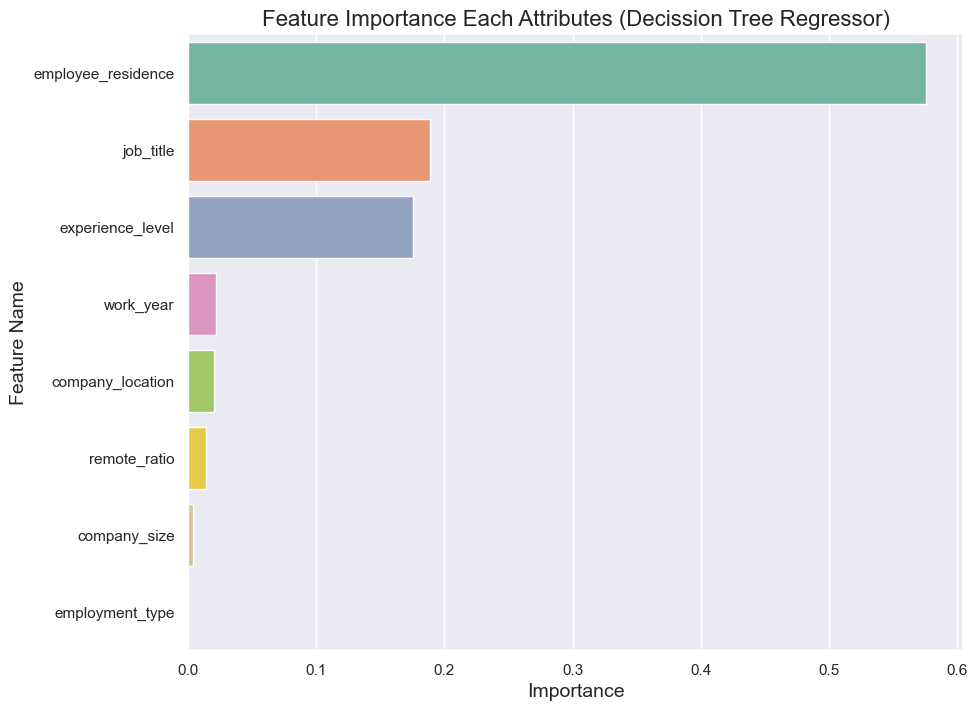

In [80]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decission Tree Regressor)', fontsize=16)
plt.xlabel ('Importance', fontsize=14)
plt.ylabel ('Feature Name', fontsize=14)
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


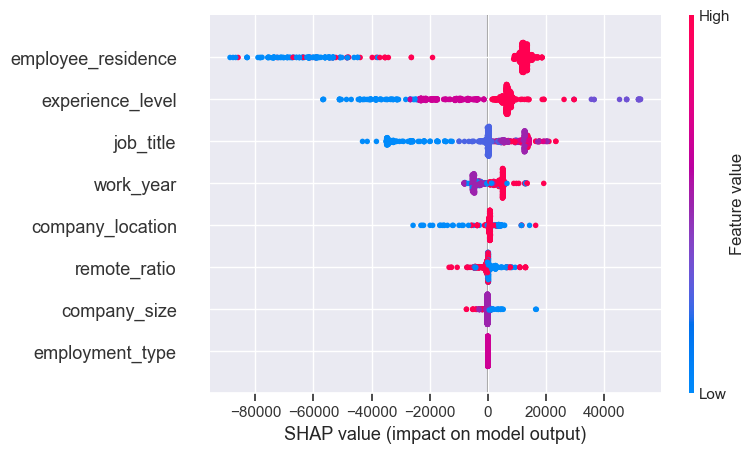

In [81]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

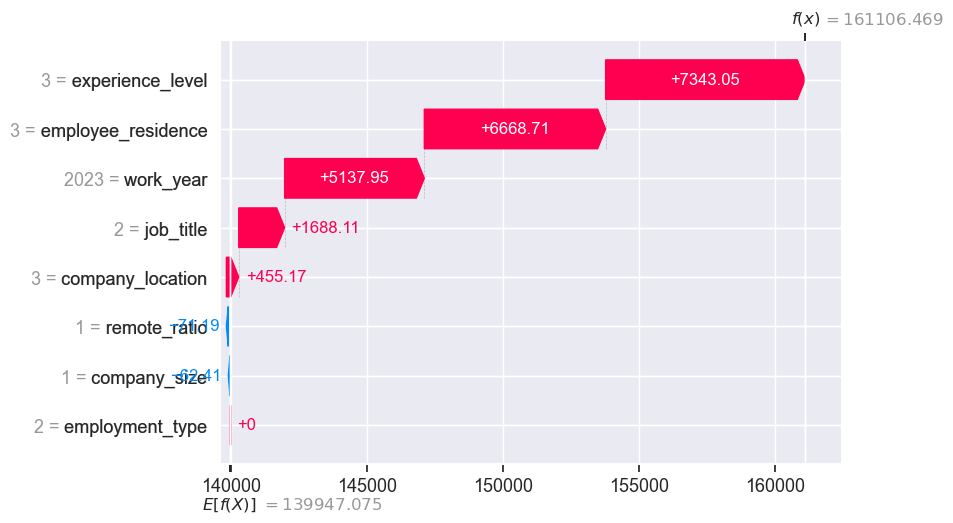

In [83]:
explainer = shap.Explainer(dtree, x_test)
shap_values = explainer(x_test)
shap.plots.waterfall(shap_values[0])